In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import glob
import os
import pandas as pd
import sklearn

In [49]:
# read all files

folder_name = 'data'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)
df

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
0,1/1/2000 1:17,NaN,NaN,0.003123
1,1/1/2000 1:17,NaN,NaN,0.002960
2,1/1/2000 1:17,NaN,NaN,0.002921
3,1/1/2000 1:17,NaN,NaN,0.002907
4,1/1/2000 1:18,NaN,NaN,0.002932
...,...,...,...,...
49307,28/01/2000 08:56:45,79.0,1.0,0.072491
49308,28/01/2000 08:57:00,88.0,1.0,0.079414
49309,28/01/2000 08:57:15,73.0,1.0,0.093463
49310,28/01/2000 08:57:30,208.0,1.0,0.161290


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49312 entries, 0 to 49311
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  49312 non-null  object 
 1   Actiwatch activity counts  49100 non-null  float64
 2   Actiware classification    48919 non-null  float64
 3   Apple Watch ENMO           49278 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [51]:
# Data clearning
# drop NaN vaules

df.dropna(subset=['Actiwatch activity counts','Actiware classification', 'Apple Watch ENMO'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48909 entries, 15 to 49310
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48909 non-null  object 
 1   Actiwatch activity counts  48909 non-null  float64
 2   Actiware classification    48909 non-null  float64
 3   Apple Watch ENMO           48909 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB
None


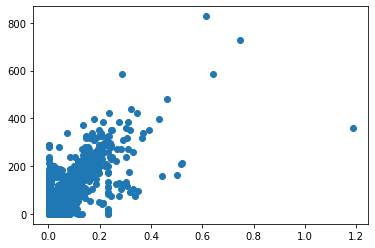

In [52]:
#Selecte independent and dependent variable
# X is independent---ENMO
# y is dependent---Actiwatch activity counts

X =df.iloc[:,3].values.reshape(-1, 1)
y=df.iloc[:,1].values.reshape(-1, 1)

plt.scatter(X, y)
plt.show()

In [53]:
# set training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [54]:
# build Polynomial Regression model (due to Simple Linear Regression can will get lower Score and Accuracy)
# PolynomialFeatures set as 4 can obtain the better Score and Accuracy

regressor = make_pipeline(PolynomialFeatures(4), LinearRegression())
regressor.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [55]:
# performance of Polynomial Regression model
# get score and Accuracy

score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.7297029822636145
Accuracy: 72.97029822636145%


In [56]:
# Use the trained regression model to predict the value of the testing dataset

y_pred = regressor.predict(X_test)
Apple_activity_counts=y_pred
print('Predict : ', Apple_activity_counts)

Predict :  [[13.50918726]
 [-0.48079096]
 [-2.36704234]
 ...
 [ 3.19215472]
 [ 0.72702847]
 [ 3.08638664]]


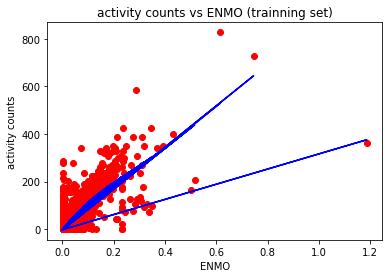

In [57]:
# polt the training set

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('activity counts vs ENMO (trainning set)')
plt.xlabel("ENMO")
plt.ylabel("activity counts")
plt.show()

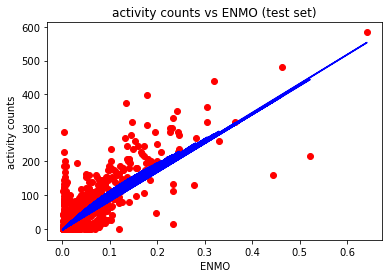

In [58]:
# polt the training set

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('activity counts vs ENMO (test set)')
plt.xlabel("ENMO")
plt.ylabel("activity counts")
plt.show()

In [59]:
# Use the trained regression model to predict the activity count values of ENMO
Apple_pred = regressor.predict(X)

# save the predict the values to df
df['Apple_pred'] = Apple_pred
print(df)
df.to_csv('new_df.csv')

                 timestamp  Actiwatch activity counts  \
15           1/1/2000 1:20                        0.0   
16           1/1/2000 1:21                       24.0   
17           1/1/2000 1:21                        3.0   
18           1/1/2000 1:21                        0.0   
19           1/1/2000 1:21                        3.0   
...                    ...                        ...   
49306  28/01/2000 08:56:30                      113.0   
49307  28/01/2000 08:56:45                       79.0   
49308  28/01/2000 08:57:00                       88.0   
49309  28/01/2000 08:57:15                       73.0   
49310  28/01/2000 08:57:30                      208.0   

       Actiware classification  Apple Watch ENMO  Apple_pred  
15                         1.0          0.007234    5.940796  
16                         1.0          0.030109   35.738614  
17                         1.0          0.008785    8.050580  
18                         1.0          0.007893    6.839463  


In [60]:
df1=pd.read_csv('new_df.csv')
print(df1)

       Unnamed: 0            timestamp  Actiwatch activity counts  \
0              15        1/1/2000 1:20                        0.0   
1              16        1/1/2000 1:21                       24.0   
2              17        1/1/2000 1:21                        3.0   
3              18        1/1/2000 1:21                        0.0   
4              19        1/1/2000 1:21                        3.0   
...           ...                  ...                        ...   
48904       49306  28/01/2000 08:56:30                      113.0   
48905       49307  28/01/2000 08:56:45                       79.0   
48906       49308  28/01/2000 08:57:00                       88.0   
48907       49309  28/01/2000 08:57:15                       73.0   
48908       49310  28/01/2000 08:57:30                      208.0   

       Actiware classification  Apple Watch ENMO  Apple_pred  
0                          1.0          0.007234    5.940796  
1                          1.0          0.030

In [61]:
x = df1['Apple_pred']
#for i in range:
for i in range(15,1520):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [62]:
for i in range(1541,3210):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [63]:
for i in range(3231,5297):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [64]:
for i in range(5322,7305):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [65]:
for i in range(7316,8858):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [66]:
for i in range(8864,10973):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [67]:
for i in range(10981,12655):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [68]:
for i in range(12669,14359):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [69]:
for i in range(14377,15868):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [70]:
for i in range(15886,18292):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [71]:
for i in range(18318,20189):  
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [72]:
for i in range(20218,22027):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [73]:
for i in range(22047,23992):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [74]:
for i in range(24011,25521):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [75]:
for i in range(25543,27618):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [76]:
for i in range(27636,29223):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [77]:
for i in range(29230,31062):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [78]:
for i in range(31085,33048):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [79]:
for i in range(33060,36015):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [80]:
for i in range(36030,37917):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [81]:
for i in range(37933,39318):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [82]:
for i in range(39333,41774):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [83]:
for i in range(41783,43231):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [84]:
for i in range(43241,45234):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [85]:
for i in range(45246,46842):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [86]:
for i in range(46857,48296):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=40:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

In [87]:
for i in range(48910,49200):
    df1.loc[i,'Apple_total_counts']=(x[i]+x[i+1]+x[i+2]+x[i+3])*0.04+(x[i+4]+x[i+5]+x[i+6]+x[i+7])*0.2+4*x[i+8]+(x[i+9]+x[i+10]+x[i+11]+x[i+12])*0.04+(x[i+13]+x[i+14]+x[i+15]+x[i+16])*0.2
    if df1['Apple_total_counts'][i]>=20:
        df1.loc[i,'Apple_classification']=1
    else:
        df1.loc[i,'Apple_classification']=0

KeyError: 48910

In [88]:
df1.dropna(subset=['Apple_total_counts'], inplace=True)

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model
import seaborn as sn
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import roc_curve
import glob
import os
import pandas as pd
from sklearn import metrics

Confusion Matrix:
[[40561  3565]
 [ 2460  1285]]


<AxesSubplot:>

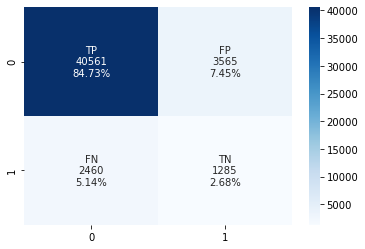

In [90]:
y_true = df1['Actiware classification'].astype(int)
y_pred = df1['Apple_classification'].astype(int)

confusion_matrix_1=confusion_matrix(y_true,y_pred)

print("Confusion Matrix:",confusion_matrix_1,sep="\n")



#plot Confusion_matrix
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix_1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix_1.flatten()/np.sum(confusion_matrix_1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(confusion_matrix_1, annot=labels, fmt='', cmap='Blues')


In [91]:
#generate classification_report
r_1 = classification_report(y_true,y_pred)
print("classification_report:",r_1,sep="\n")

print("Cohen’s Kappa score:", cohen_kappa_score(y_true, y_pred))
print("Matthews correlation coefficient score:", matthews_corrcoef(y_true, y_pred))

classification_report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44126
           1       0.26      0.34      0.30      3745

    accuracy                           0.87     47871
   macro avg       0.60      0.63      0.61     47871
weighted avg       0.89      0.87      0.88     47871

Cohen’s Kappa score: 0.23112836771138623
Matthews correlation coefficient score: 0.2334611704704649


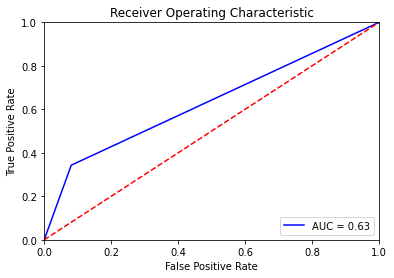

In [92]:
#plot ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix
y_true = df1['Actiware classification']
y_pred = df1['Apple_classification']
confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

precision = TN / (TP+FP)  # 查准率
recall = TN / (TP+FN)  # 查全率
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("TN,FP,FN,TP:",TN,FP,FN,TP)
print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)

TN,FP,FN,TP: 40561 3565 2460 1285
precision: 8.363092783505154
recall: 10.830707610146863
accuracy: 0.8741409203902154


###### 